In [481]:
## Imports 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#
combined_df_matches=pd.read_csv('compas_data_combined_matches.csv')
combined_df_matches.info(), display(combined_df_matches)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     7214 non-null   int64  
 1   FirstName                              7214 non-null   object 
 2   LastName                               7214 non-null   object 
 3   DateOfBirth                            7214 non-null   object 
 4   priors_count                           7214 non-null   float64
 5   age                                    7214 non-null   float64
 6   v_decile_score                         7214 non-null   float64
 7   two_year_recid                         7214 non-null   float64
 8   is_recid                               7214 non-null   float64
 9   juv_fel_count                          7214 non-null   float64
 10  juv_misd_count                         7214 non-null   float64
 11  juv_

,id,FirstName,LastName,DateOfBirth,priors_count,age,v_decile_score,two_year_recid,is_recid,juv_fel_count,...,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DecileScore_Risk of Failure to Appear,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence,_merge
0,1,miguel,hernandez,1947-04-18,0.0,69.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,3,kevon,dixon,1982-01-22,0.0,34.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,6.0,3.0,1.0,25.0,-0.76,-3.07,both
2,4,ed,philo,1991-05-14,4.0,24.0,3.0,1.0,1.0,0.0,...,1.0,0.0,0.0,7.0,4.0,3.0,26.0,-0.66,-2.26,both
3,5,marcu,brown,1993-01-21,1.0,23.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,8.0,6.0,19.0,0.16,-1.59,both
4,6,bouthy,pierrelouis,1973-01-22,2.0,43.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven,butler,1992-07-17,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,7.0,5.0,14.0,0.05,-1.86,both
7210,10997,malcolm,simmons,1993-03-25,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,5.0,15.0,-0.79,-1.90,both
7211,10999,winston,gregory,1958-10-01,0.0,57.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
7212,11000,farrah,jean,1982-11-17,3.0,33.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,2.0,11.0,-1.50,-2.92,both


(None, None)

In [482]:
combined_df_matches=combined_df_matches.loc[combined_df_matches._merge=='both']
combined_df_matches=combined_df_matches.dropna()
combined_df_matches

,id,FirstName,LastName,DateOfBirth,priors_count,age,v_decile_score,two_year_recid,is_recid,juv_fel_count,...,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DecileScore_Risk of Failure to Appear,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence,_merge
1,3,kevon,dixon,1982-01-22,0.0,34.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,6.0,3.0,1.0,25.0,-0.76,-3.07,both
2,4,ed,philo,1991-05-14,4.0,24.0,3.0,1.0,1.0,0.0,...,1.0,0.0,0.0,7.0,4.0,3.0,26.0,-0.66,-2.26,both
3,5,marcu,brown,1993-01-21,1.0,23.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,3.0,8.0,6.0,19.0,0.16,-1.59,both
6,8,edward,riddle,1974-07-23,14.0,41.0,2.0,1.0,1.0,0.0,...,1.0,0.0,0.0,8.0,6.0,2.0,30.0,-0.16,-2.89,both
9,13,bo,bradac,1994-06-10,1.0,21.0,5.0,1.0,1.0,0.0,...,1.0,0.0,0.0,4.0,3.0,5.0,21.0,-0.79,-1.84,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,10995,raheem,smith,1995-06-28,0.0,20.0,9.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,9.0,9.0,13.0,0.40,-0.76,both
7209,10996,steven,butler,1992-07-17,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,7.0,5.0,14.0,0.05,-1.86,both
7210,10997,malcolm,simmons,1993-03-25,0.0,23.0,5.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,3.0,5.0,15.0,-0.79,-1.90,both
7212,11000,farrah,jean,1982-11-17,3.0,33.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,2.0,2.0,11.0,-1.50,-2.92,both


In [483]:
two_year_recid=combined_df_matches.two_year_recid
is_recid=combined_df_matches.is_recid
drop = ['LastName','FirstName','id','DateOfBirth','two_year_recid',
        'is_recid','_merge','Other','Female','above_45','race','sex']
combined_df_matches_cleaned = combined_df_matches.drop(columns=drop)
combined_df_matches_cleaned.isnull().sum()

priors_count                              0
age                                       0
v_decile_score                            0
juv_fel_count                             0
juv_misd_count                            0
juv_other_count                           0
c_charge_desc                            17
below_25                                  0
is_felon                                  0
is_misdemeanor                            0
Male                                      0
African-American                          0
Asian                                     0
Caucasian                                 0
Hispanic                                  0
Native American                           0
Language_English                          0
Language_Spanish                          0
MaritalStatus_Divorced                    0
MaritalStatus_Married                     0
MaritalStatus_Separated                   0
MaritalStatus_Significant Other           0
MaritalStatus_Single            

In [501]:
combined_df_matches_cleaned.c_charge_desc.loc[combined_df_matches_cleaned.c_charge_desc.isnull()==True]

160     NaN
363     NaN
842     NaN
2728    NaN
2762    NaN
2965    NaN
2979    NaN
3206    NaN
3319    NaN
4287    NaN
4431    NaN
4671    NaN
5449    NaN
5712    NaN
5915    NaN
6030    NaN
6977    NaN
Name: c_charge_desc, dtype: object

In [530]:
# Only run if still have missing data

import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize , poly)

combined_df_matches_cleaned.loc[combined_df_matches_cleaned.c_charge_desc.isna()==True]
c=combined_df_matches_cleaned.copy()
c['miss']=np.where(c.c_charge_desc.isnull()==True,1,0)
c=c.drop(columns=['c_charge_desc'])

glm = sm.GLM(two_year_recid, c,family=sm.families.Binomial()) 
results = glm.fit()
summarize(results)

,coef,std err,z,P>|z|
priors_count,0.1370,0.011,12.208,0.000
age,-0.0579,0.010,-5.909,0.000
v_decile_score,0.0154,0.181,0.085,0.932
juv_fel_count,0.0531,0.084,0.635,0.526
juv_misd_count,-0.0693,0.074,-0.940,0.347
juv_other_count,0.1162,0.064,1.812,0.070
below_25,0.0951,0.101,0.940,0.347
is_felon,0.0702,0.485,0.145,0.885
is_misdemeanor,-0.0460,0.486,-0.095,0.925
Male,0.2925,0.103,2.838,0.005


In [381]:
# from sklearn.decomposition import PCA

# combined_df_matches_cleaned.c_charge_desc.value_counts()[0:10]
# charge_desc=combined_df_matches_cleaned[['c_charge_desc']]
# charge_desc=pd.get_dummies(charge_desc,columns=['c_charge_desc'],drop_first=True)
# pca=PCA()
# charge_desc_red=pca.fit(charge_desc)
# evals=pca.explained_variance_/np.sum(pca.explained_variance_)
# cumsum=np.cumsum(evals)
# evalnum=[0]
# for i in range(1,len(cumsum)):
#     if cumsum[i]-cumsum[i-1]>=.05:
#         evalnum.append(i)
# num=len(cumsum[evalnum])
# evecs=pca.components_[:num]
# charge_desc_reduce=np.matmul(charge_desc,evecs.T)
# charge_desc_reduce

# combined_df_matches_cleaned['Battery']=np.where(
#     combined_df_matches_cleaned.c_charge_desc=='Battery',1,0)
# combined_df_matches_cleaned['ACNC']=np.where(
#     combined_df_matches_cleaned.c_charge_desc=='arrest case no charge',1,0)
# combined_df_matches_cleaned['GT3']=np.where(
#     combined_df_matches_cleaned.c_charge_desc=='Grand Theft in the 3rd Degree',1,0)
# combined_df_matches_cleaned['Cocaine']=np.where(
#     combined_df_matches_cleaned.c_charge_desc=='Possession of Cocaine',1,0)
# combined_df_matches_cleaned['DWLR']=np.where(
#     combined_df_matches_cleaned.c_charge_desc=='Driving While License Revoked',1,0)
# combined_df_matches_cleaned.isnull().sum()
combined_df_matches_cleaned

,priors_count,age,v_decile_score,juv_fel_count,juv_misd_count,juv_other_count,c_charge_desc,below_25,is_felon,is_misdemeanor,...,MaritalStatus_Significant Other,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DecileScore_Risk of Failure to Appear,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence
1,0.0,34.0,1.0,0.0,0.0,0.0,Felony Battery w/Prior Convict,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,6.0,3.0,1.0,25.0,-0.76,-3.07
2,4.0,24.0,3.0,0.0,0.0,1.0,Possession of Cocaine,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,7.0,4.0,3.0,26.0,-0.66,-2.26
3,1.0,23.0,6.0,0.0,1.0,0.0,Possession of Cannabis,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,3.0,8.0,6.0,19.0,0.16,-1.59
6,14.0,41.0,2.0,0.0,0.0,0.0,Possession Burglary Tools,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,8.0,6.0,2.0,30.0,-0.16,-2.89
9,1.0,21.0,5.0,0.0,0.0,0.0,Insurance Fraud,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,4.0,3.0,5.0,21.0,-0.79,-1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,0.0,20.0,9.0,0.0,0.0,0.0,Possession of Cocaine,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,9.0,9.0,13.0,0.40,-0.76
7209,0.0,23.0,5.0,0.0,0.0,0.0,Deliver Cannabis,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,7.0,5.0,14.0,0.05,-1.86
7210,0.0,23.0,5.0,0.0,0.0,0.0,Leaving the Scene of Accident,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,3.0,5.0,15.0,-0.79,-1.90
7212,3.0,33.0,2.0,0.0,0.0,0.0,Battery on Law Enforc Officer,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,-1.50,-2.92


In [382]:
combined_df_matches_cleaned=combined_df_matches_cleaned.drop(columns=['c_charge_desc'])
combined_df_matches_cleaned.columns

Index(['priors_count', 'age', 'v_decile_score', 'juv_fel_count',
       'juv_misd_count', 'juv_other_count', 'below_25', 'is_felon',
       'is_misdemeanor', 'Male', 'African-American', 'Asian', 'Caucasian',
       'Hispanic', 'Native American', 'Language_English', 'Language_Spanish',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Significant Other',
       'MaritalStatus_Single', 'MaritalStatus_Unknown',
       'MaritalStatus_Widowed', 'DecileScore_Risk of Failure to Appear',
       'DecileScore_Risk of Recidivism', 'DecileScore_Risk of Violence',
       'RawScore_Risk of Failure to Appear', 'RawScore_Risk of Recidivism',
       'RawScore_Risk of Violence'],
      dtype='object')

In [384]:
# columns_to_drop = ['v_decile_score', 'DecileScore_Risk of Failure to Appear', 'DecileScore_Risk of Recidivism', 'DecileScore_Risk of Violence', 'RawScore_Risk of Failure to Appear', 'RawScore_Risk of Recidivism', 'RawScore_Risk of Violence']#,
# #                   'MaritalStatus_Divorced',
# #       'MaritalStatus_Married', 'MaritalStatus_Separated',
# #       'MaritalStatus_Significant Other', 'MaritalStatus_Single',
# #       'MaritalStatus_Unknown', 'MaritalStatus_Widowed']
# combined_df_matches_cleaned = combined_df_matches_cleaned.drop(columns=columns_to_drop)
combined_df_matches_cleaned.columns

Index(['priors_count', 'age', 'v_decile_score', 'juv_fel_count',
       'juv_misd_count', 'juv_other_count', 'below_25', 'is_felon',
       'is_misdemeanor', 'Male', 'African-American', 'Asian', 'Caucasian',
       'Hispanic', 'Native American', 'Language_English', 'Language_Spanish',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Separated', 'MaritalStatus_Significant Other',
       'MaritalStatus_Single', 'MaritalStatus_Unknown',
       'MaritalStatus_Widowed', 'DecileScore_Risk of Failure to Appear',
       'DecileScore_Risk of Recidivism', 'DecileScore_Risk of Violence',
       'RawScore_Risk of Failure to Appear', 'RawScore_Risk of Recidivism',
       'RawScore_Risk of Violence'],
      dtype='object')

In [385]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import itertools
from sklearn import metrics
from sklearn.model_selection import KFold

kf=KFold(n_splits=10)
X_train, X_test, y_train, y_test=train_test_split(combined_df_matches_cleaned,
                                                  two_year_recid,
                                                  test_size=0.33,
                                                  random_state=0)
clf=RF(random_state=0)
#lamb=np.arange(1,round(combined_df_matches_cleaned.shape[1]/2))
GCV=GridSearchCV(clf,param_grid={'max_features':['sqrt', 'log2', None],
                                 'n_estimators': [50, 100, 200],
                                'max_depth': [None, 10, 20, 30],
                                'min_samples_split': [2, 5, 10]},
                 scoring='accuracy',cv=5)
GCV.fit(X_train,y_train)
max_feats=GCV.best_params_['max_features']
n_est=GCV.best_params_['n_estimators']
max_dep=GCV.best_params_['max_depth']
mss=GCV.best_params_['min_samples_split']
max_feats

'log2'

In [386]:
clf=RF(max_features=max_feats,min_samples_split=mss,max_depth=max_dep,n_estimators=n_est,random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(0.6734207389749702,
 array([0.63690476, 0.6547619 , 0.66071429, 0.61904762, 0.66666667,
        0.66071429, 0.61904762, 0.67261905, 0.67664671, 0.65868263]))

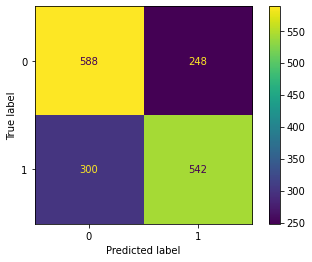

In [387]:
preds=clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels = [0, 1])
cm_display.plot()

In [396]:
(588+542)/(588+542+300+248)

0.6734207389749702

In [388]:
combined_df_matches_cleaned

,priors_count,age,v_decile_score,juv_fel_count,juv_misd_count,juv_other_count,below_25,is_felon,is_misdemeanor,Male,...,MaritalStatus_Significant Other,MaritalStatus_Single,MaritalStatus_Unknown,MaritalStatus_Widowed,DecileScore_Risk of Failure to Appear,DecileScore_Risk of Recidivism,DecileScore_Risk of Violence,RawScore_Risk of Failure to Appear,RawScore_Risk of Recidivism,RawScore_Risk of Violence
1,0.0,34.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,6.0,3.0,1.0,25.0,-0.76,-3.07
2,4.0,24.0,3.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,7.0,4.0,3.0,26.0,-0.66,-2.26
3,1.0,23.0,6.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,3.0,8.0,6.0,19.0,0.16,-1.59
6,14.0,41.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,8.0,6.0,2.0,30.0,-0.16,-2.89
9,1.0,21.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,4.0,3.0,5.0,21.0,-0.79,-1.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7208,0.0,20.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,9.0,9.0,13.0,0.40,-0.76
7209,0.0,23.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,7.0,5.0,14.0,0.05,-1.86
7210,0.0,23.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,3.0,5.0,15.0,-0.79,-1.90
7212,3.0,33.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,-1.50,-2.92


In [389]:
import numpy as np
from scipy.special import expit
from scipy.optimize import minimize
from sklearn.ensemble import RandomForestClassifier


class WCRF:
    def __init__(self, n_trees=100, s=2, gamma=1, labda=1, tree_max_depth=None, combination=1, data_name=None, random_state=None):
        # build a random forest using sklearn RandomForestClassifier
        self.n_trees = n_trees
        self.s = s
        self.labda = labda
        self.gamma = gamma
        self.combination = combination
        self.data_name = data_name
        self.w = np.ones(n_trees)/n_trees
        self.model = RandomForestClassifier(n_estimators=n_trees, max_depth=tree_max_depth, random_state=random_state)
        
        
    def fit(self, X, y):
        # fit the model with training set
        self.model.fit(X,y)
        self.classes = self.model.classes_
        self.n_classes = len(self.classes)

        
        # calculate number of sample in each leave for every tree
        trees = self.model.estimators_
        self.leaves_sample_count = []
        for tree in trees:
            leaves_dict = {}
            n_nodes = tree.tree_.node_count
            children_left = tree.tree_.children_left
            children_right = tree.tree_.children_right
            value = tree.tree_.value.reshape((-1, self.n_classes))
            for i in range(n_nodes):
                is_leaf = (children_left[i] == children_right[i])
                if is_leaf:
                    leaves_dict[i] = value[i]
                    
            self.leaves_sample_count.append(leaves_dict)
        
        # get regions
        regions = self.model.apply(X)
#         regions = list(set(tuple(region) for region in regions))
        
        # create sample number counter dictionary for each region
        self.regions_sample_count = dict()
        sample_count_array = np.zeros((len(regions), self.n_trees,self.n_classes))
        
        # initialize sample counter for each region, the key is a region presented by tuple, the value is a ndarray
        for i in range(len(regions)):
            region = tuple(regions[i])
            self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))   
            
        # build sample counter for each region
            for t in range(self.n_trees):
                self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                sample_count_array[i][t] = self.leaves_sample_count[t][region[t]]

        self.regions_pred_info = dict()

        return 
        

    def fit_w(self, X, y):
        alpha = 10
        beta = 2
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        valid_regions = self.model.apply(X)
        
        for i in range(len(valid_regions)):
            region=tuple(valid_regions[i])
            if region not in self.regions_pred_info.keys():
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for t in range(self.n_trees):
                    self.regions_sample_count[region][t] = self.leaves_sample_count[t][region[t]]
                self.regions_pred_info[region] = self.treat_region(region)
            pred_info = self.regions_pred_info[region]
            p_intervals.append(pred_info[3])
            
        p_intervals = np.array(p_intervals)
        p_infs = p_intervals[:,:,0]
        p_sups = p_intervals[:,:,1]

        if self.combination==1:
            k_under = (p_infs>=0.5)+0
            k_over = (p_sups>0.5)+0
        if self.combination==2:
            k_under = p_infs
            k_over = p_sups
        
        def cost_func(w, labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))

            cost = -sum(y*np.log(u_under+0.0001) + (1-y)*np.log(1-u_over+0.0001) + gamma*np.log(1-u+0.0001))/len(y) + 0.5*labda*sum(w**2)

            return cost


        def jac(w,labda=self.labda, gamma=self.gamma):
            bels = (k_under*w).sum(axis=1)
            pls = (k_over*w).sum(axis=1)
            u_under = expit(alpha*(bels- 0.5))
            u_over = expit(alpha*(pls - 0.5))
            u = expit(beta*(bels - 0.5)*(pls - 0.5))
            
            der_1 = -alpha*(y*(1-u_under))@k_under
            der_2 = alpha*((1-y)*u_over)@k_over
            der_3 = beta*(k_under.T@(u.reshape((len(y),1))*k_over) + k_over.T@(u.reshape((len(y),1))*k_under))@w - 0.5*u@(k_under+k_over)

            der_j = (der_1 + der_2 + gamma*der_3)/len(y) + labda*w
            
            return der_j
        
        cons = [{'type': 'eq', 'fun':lambda w: sum(w)-1}]

        bounds = [(0,1)] * self.n_trees
        
        w0 = np.random.rand(self.n_trees)
        res = minimize(cost_func, w0, method='SLSQP',jac=jac, constraints=cons, bounds=bounds)
        self.w = res.x
        return
        
        
    def treat_region(self, region):
        sample_count = self.regions_sample_count[region]
        sample_count[:,0] = sample_count[:,0] + sample_count[:,1]
        
        p_intervals = np.zeros_like(sample_count)
        
        p_intervals[:,0] = sample_count[:,1]/(sample_count[:,0] + self.s)
        p_intervals[:,1] = (sample_count[:,1] + self.s)/(sample_count[:,0] + self.s)

        
        # predict
        if self.combination==1:
            k_under = (p_intervals[:,0]>=0.5)+0
            k_over = (p_intervals[:,1]>0.5)+0
            bel = round(sum(k_under*self.w),4)
            pl = round(sum(k_over*self.w),4)
            
        if self.combination==2:
            bel = round(sum(p_intervals[:,0]*self.w),4)
            pl = round(sum(p_intervals[:,1]*self.w),4)
        
        if bel >= 0.5:
            prediction = self.classes[1]
        elif pl <= 0.5:
            prediction = self.classes[0]
        else:
            prediction = -1

        return (prediction, bel, pl, p_intervals, sample_count)

        
    def predict(self, X, plot=False):
        count = 0
        # intitialize prediciton list
        predictions = np.zeros(len(X))
        pred_intervals = []
        p_intervals = []
        # get falling leaves for each sample in every tree, return array (n_sample * number_trees)
        test_regions = self.model.apply(X)
        
        for i in range(len(test_regions)):
            region=tuple(test_regions[i])
            if region not in self.regions_pred_info.keys() or True:
                self.regions_sample_count[region] = np.zeros((self.n_trees, self.n_classes))
                for j in range(self.n_trees):
                    self.regions_sample_count[region][j] = self.leaves_sample_count[j][region[j]]
                self.regions_pred_info[region] = self.treat_region(region)
#                 pred_info = self.treat_region(region)
                count += 1
            pred_info = self.regions_pred_info[region]
            
            #print('bel=',pred_info[1],'pl=',pred_info[2],'pre=',pred_info[0])
            predictions[i] = pred_info[0]
            pred_intervals.append([pred_info[1], pred_info[2]])
            p_intervals.append(pred_info[3])
            
        return predictions, pred_intervals, p_intervals
    
    
    def evaluate(self, X_test, y_test,  plot=False, show_confusion_matrix=False):
        # get both imprecise and precise predictions 
        imprecise_predictions ,pred_intervals, p_intervals = self.predict(X_test, y_test)
        precise_predictions = np.zeros(len(y_test))
        if self.combination==2:
            precise_predictions = self.model.predict(X_test)
        else:
            for tree in self.model.estimators_:
                precise_predictions += tree.predict(X_test)
            precise_predictions /= self.n_trees
            precise_predictions[precise_predictions>=0.5] = self.classes[1]
            precise_predictions[precise_predictions<0.5] = self.classes[0]
        
        indeterminate_instance = (imprecise_predictions == -1)
        determinate_instance = (imprecise_predictions != -1)
        
        # calculate single-set length
        single_set_length = len(y_test) - sum(indeterminate_instance)
        
        # calculate determinacy
        determinacy = single_set_length/len(y_test)
        determinacy = round(determinacy*100, 2)
        
        # calculate single-set accuracy
        single_set_accuracy = sum(y_test[determinate_instance]==imprecise_predictions[determinate_instance])/single_set_length
        single_set_accuracy = round(single_set_accuracy*100, 2)
        
        # claculate u65
        u65_score = round(65 + (single_set_accuracy - 65)*determinacy/100, 2)
        
        # claculate precise accuracy
        precise_accuracy = sum(y_test==precise_predictions)/len(y_test)
        precise_accuracy = round(precise_accuracy*100, 2)
        
        # show confusion matrix
        if show_confusion_matrix:
            print('imprecise confusion matrix')
            cm1=metrics.confusion_matrix(y_test, imprecise_predictions)
            cm_display1=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                          display_labels = [0, 1])
            cm_display1.plot()
        
            print('precise confusion matrix')
            cm2=metrics.confusion_matrix(y_test, precise_predictions)
            cm_display2=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2,
                                          display_labels = [0, 1])
            cm_display2.plot()
        # return result
        return {'u65_score':u65_score, 
                'single_set_accuracy':single_set_accuracy, 
                'determinacy':determinacy, 
                'precise_accuracy':precise_accuracy}, pred_intervals, p_intervals

In [390]:
opt=0;opt_s=0;opt_gam=0;opt_lam=0
for i in range(1,10):
    print(i)
    for j in range(1,10):
        print(j)
        for k in range(1,10):
            print(k)
            CRF=WCRF(s=i,gamma=j,labda=k)
            CRF.fit(X_train,y_train)
            CRF.fit_w(X_train,y_train)
            preds=CRF.predict(X_test)[0]
            if np.mean(preds==y_test)>opt:
                opt_s=i; opt_gam=j; opt_lam=k
                opt=np.mean(preds==y_test)
opt_s, opt_gam, opt_lam

1
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3
4
5
6
7
8
9
6
1
2
3
4
5
6
7
8
9
7
1
2
3
4
5
6
7
8
9
8
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
2
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3
4
5
6
7
8
9
6
1
2
3
4
5
6
7
8
9
7
1
2
3
4
5
6
7
8
9
8
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
3
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3
4
5
6
7
8
9
6
1
2
3
4
5
6
7
8
9
7
1
2
3
4
5
6
7
8
9
8
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
4
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3
4
5
6
7
8
9
6
1
2
3
4
5
6
7
8
9
7
1
2
3
4
5
6
7
8
9
8
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
5
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3
4
5
6
7
8
9
6
1
2
3
4
5
6
7
8
9
7
1
2
3
4
5
6
7
8
9
8
1
2
3
4
5
6
7
8
9
9
1
2
3
4
5
6
7
8
9
6
1
1
2
3
4
5
6
7
8
9
2
1
2
3
4
5
6
7
8
9
3
1
2
3
4
5
6
7
8
9
4
1
2
3
4
5
6
7
8
9
5
1
2
3


(1, 1, 5)

In [210]:
# lamb=np.arange(1,10)
# opt=0; opt_s=0
# for i in lamb:
#     print(i)
#     CRF=WCRF(s=i)
#     CRF.fit(X_train,y_train)
#     CRF.fit_w(X_train,y_train)
#     preds=CRF.predict(X_test)[0]
#     if np.mean(preds==y_test)>opt:
#         opt_s=i
#         opt=np.mean(preds==y_test)
# opt_s

1
2
3
4
5
6
7
8
9


1

In [211]:
# lamb=np.arange(1,10)
# opt=0; opt_gam=0
# for i in lamb:
#     print(i)
#     CRF=WCRF(s=opt_s,gamma=i)
#     CRF.fit(X_train,y_train)
#     CRF.fit_w(X_train,y_train)
#     preds=CRF.predict(X_test)[0]
#     if np.mean(preds==y_test)>opt:
#         opt_gam=i
#         opt=np.mean(preds==y_test)
# opt_gam

1
2
3
4
5
6
7
8
9


1

In [212]:
# lamb=np.arange(1,10)
# opt=0; opt_lam=0
# for i in lamb:
#     print(i)
#     CRF=WCRF(s=opt_lam,labda=i)
#     CRF.fit(X_train,y_train)
#     CRF.fit_w(X_train,y_train)
#     preds=CRF.predict(X_test)[0]
#     if np.mean(preds==y_test)>opt:
#         opt_lam=i
#         opt=np.mean(preds==y_test)
# opt_lam

1
2
3
4
5
6
7
8
9


4

In [391]:
CRF=WCRF(s=opt_s,gamma=opt_gam,labda=opt_lam)
CRF.fit(X_train,y_train)
CRF.fit_w(X_train,y_train)
CRF.w

array([0.00745063, 0.00848029, 0.00906046, 0.0111897 , 0.0098182 ,
       0.01156311, 0.00912745, 0.01068164, 0.01144105, 0.00999013,
       0.00925739, 0.01025414, 0.01228443, 0.00983858, 0.00899537,
       0.00863719, 0.00887421, 0.0124204 , 0.00916127, 0.01200631,
       0.00922147, 0.00929041, 0.00957835, 0.0120135 , 0.01061444,
       0.00818646, 0.01217757, 0.01128441, 0.00829131, 0.00994944,
       0.01041884, 0.00933497, 0.00878793, 0.01113388, 0.01185515,
       0.01019343, 0.00895681, 0.01037374, 0.0088242 , 0.00885211,
       0.00741633, 0.00907537, 0.01029992, 0.00895331, 0.01007558,
       0.0082363 , 0.01074497, 0.01089012, 0.00865555, 0.01009249,
       0.00988069, 0.01061451, 0.01122396, 0.01001758, 0.01078306,
       0.01118121, 0.01112361, 0.00960978, 0.0096948 , 0.00991105,
       0.01053095, 0.01024489, 0.01119933, 0.00871248, 0.0087166 ,
       0.01054307, 0.00903087, 0.00936614, 0.00898221, 0.00929712,
       0.01052097, 0.01209854, 0.00995001, 0.01073977, 0.00978

imprecise confusion matrix
precise confusion matrix


{'u65_score': 65.44,
 'single_set_accuracy': 65.44,
 'determinacy': 100.0,
 'precise_accuracy': 64.78}

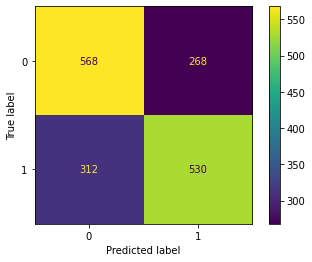

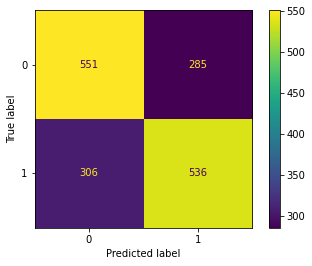

In [564]:
evals=CRF.evaluate(X_test,y_test,show_confusion_matrix=True)
evals[0]

In [393]:
(568+530)/(568+530+312+268), (551+536)/(285+306+551+536)

(0.6543504171632897, 0.6477949940405244)

In [397]:
(588+542)/(588+542+300+248)

0.6734207389749702

In [605]:
HD=pd.read_csv('heart_disease_uci.csv')
cols_to_drop=['id','dataset']
HD_cleaned=HD.drop(columns=cols_to_drop)
HD_cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [606]:
dummycols=['sex','cp','restecg','slope','thal']
HD_cleaned=pd.get_dummies(HD_cleaned,columns=dummycols,drop_first=True)

In [607]:
HD_cleaned.isnull().sum()

age                           0
trestbps                     59
chol                         30
fbs                          90
thalch                       55
exang                        55
oldpeak                      62
ca                          611
num                           0
sex_Male                      0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
restecg_normal                0
restecg_st-t abnormality      0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
dtype: int64

In [608]:
c=HD_cleaned.copy()

# Test each one of these to see which is significant
#c['miss_trestbps']=np.where(np.isnan(c.trestbps)==True,1,0)
#c['miss_chol']=np.where(np.isnan(c.chol)==True,1,0)
#c['miss_fbs']=np.where(c.fbs.isnull()==True,1,0)
#c['miss_thalch']=np.where(c.thalch.isnull()==True,1,0)
# c['miss_exang']=np.where(c.exang.isnull()==True,1,0)
c['miss_oldpeak']=np.where(c.oldpeak.isnull()==True,1,0)
#c['miss_ca']=np.where(np.isnan(c.ca)==True,1,0)

c_num=c.num
c=c.drop(columns=['trestbps','chol','fbs','thalch','exang','oldpeak','ca','num'])
c_num=np.array(c_num)
#glm = sm.GLM(c_num,c.astype(float),family=sm.families.Binomial()) 
glm=sm.OLS(c_num,c.astype(float))
results = glm.fit()
summarize(results)

,coef,std err,t,P>|t|
age,0.0200,0.002,10.493,0.000
sex_Male,0.3330,0.076,4.355,0.000
cp_atypical angina,-0.8663,0.085,-10.205,0.000
cp_non-anginal,-0.5746,0.080,-7.192,0.000
cp_typical angina,-0.6292,0.145,-4.345,0.000
restecg_normal,-0.2285,0.076,-3.004,0.003
restecg_st-t abnormality,0.0176,0.103,0.171,0.865
slope_flat,0.2450,0.080,3.062,0.002
slope_upsloping,-0.0726,0.095,-0.762,0.446
thal_normal,-0.2203,0.096,-2.294,0.022


In [609]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

dropcols=['trestbps','fbs','oldpeak']
HD_cleaned
HD_cleaned=HD_cleaned.drop(columns=dropcols)
imp = IterativeImputer(max_iter=1000, random_state=0)
imp=imp.fit(HD_cleaned)
Ximp=imp.transform(HD_cleaned)
Ximp=pd.DataFrame(Ximp,columns=HD_cleaned.columns)
X=Ximp
X

,age,chol,thalch,exang,ca,num,sex_Male,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63.0,233.0,150.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67.0,286.0,108.000000,1.000000,3.000000,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,67.0,229.0,129.000000,1.000000,2.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,37.0,250.0,187.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,41.0,204.0,172.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,333.0,154.000000,0.000000,0.640422,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
916,62.0,139.0,131.183542,0.132940,0.513554,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
917,55.0,223.0,100.000000,0.000000,1.020959,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
918,58.0,385.0,136.523319,0.403061,0.467751,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [610]:
num_first=X.num
num=np.where(num_first>0,1,0)
X=X.drop(columns=['num'])
kf=KFold(n_splits=10)
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  num,
                                                  test_size=0.33,
                                                  random_state=0)
clf=RF(random_state=0)
#lamb=np.arange(1,round(combined_df_matches_cleaned.shape[1]/2))
GCV=GridSearchCV(clf,param_grid={'max_features':['sqrt', 'log2'],
                                 'n_estimators': [50, 100, 200],
                                'max_depth': [10, 20, 30],
                                'min_samples_split': [2, 5, 10]},
                 scoring='accuracy',cv=5)
GCV.fit(X_train,y_train)
max_feats=GCV.best_params_['max_features']
n_est=GCV.best_params_['n_estimators']
max_dep=GCV.best_params_['max_depth']
mss=GCV.best_params_['min_samples_split']
max_feats

'sqrt'

In [611]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 200}

In [612]:
clf=RF(max_features=max_feats,min_samples_split=mss,max_depth=max_dep,n_estimators=n_est,random_state=0)
clf.fit(X_train,y_train)
score=clf.score(X_test,y_test)
cvscore=cross_val_score(clf,X_test,y_test,cv=10)
score,cvscore

(0.8717105263157895,
 array([0.87096774, 0.80645161, 0.87096774, 0.80645161, 0.8       ,
        0.9       , 0.93333333, 0.8       , 0.86666667, 0.8       ]))

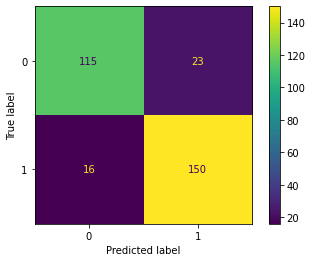

In [614]:
preds=clf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test,preds)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                                          display_labels = [0,1])
cm_display.plot()

In [615]:
opt=0;opt_s=0;opt_gam=0;opt_lam=0
c=0
for i in range(1,10):
    for j in range(1,10):
        for k in range(1,10):
            CRF1=WCRF(s=i,gamma=j,labda=k)
            CRF1.fit(X_train,y_train)
            CRF1.fit_w(X_train,y_train)
            preds=CRF1.predict(X_test)[0]
            if np.mean(preds==y_test)>opt:
                opt_s=i; opt_gam=j; opt_lam=k
                opt=np.mean(preds==y_test)
            c+=1
            print(c)
opt_s, opt_gam, opt_lam

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


(1, 1, 8)

In [616]:
CRF1=WCRF(s=opt_s,gamma=opt_gam,labda=opt_lam)
CRF1.fit(X_train,y_train)
CRF1.fit_w(X_train,y_train)
CRF1.w

array([0.00928842, 0.00722462, 0.00958789, 0.01071459, 0.00872743,
       0.0109566 , 0.01044562, 0.00827478, 0.01230342, 0.00848575,
       0.01276356, 0.00909234, 0.00949959, 0.00944523, 0.01039534,
       0.00921831, 0.01274049, 0.00712399, 0.0082133 , 0.00987992,
       0.01127338, 0.00931488, 0.00827879, 0.01029849, 0.01116019,
       0.00908617, 0.00959228, 0.00946189, 0.00765132, 0.0124831 ,
       0.00963146, 0.00862509, 0.0101572 , 0.01088269, 0.01017452,
       0.00965998, 0.00893022, 0.00829681, 0.01179186, 0.01373943,
       0.01055226, 0.01035736, 0.0113044 , 0.00622316, 0.01191711,
       0.00945099, 0.01057526, 0.00842836, 0.00877113, 0.01031291,
       0.00987981, 0.00813073, 0.0078483 , 0.01280144, 0.01260173,
       0.00746327, 0.00970104, 0.00891831, 0.00774235, 0.00990856,
       0.01025705, 0.01071111, 0.01317681, 0.00998764, 0.01123555,
       0.01053673, 0.01313896, 0.00825017, 0.00896808, 0.00916939,
       0.00888274, 0.01153544, 0.01118042, 0.01028111, 0.00878

imprecise confusion matrix
precise confusion matrix


{'u65_score': 86.84,
 'single_set_accuracy': 86.84,
 'determinacy': 100.0,
 'precise_accuracy': 86.84}

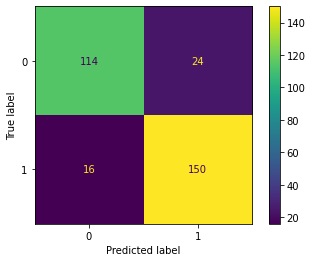

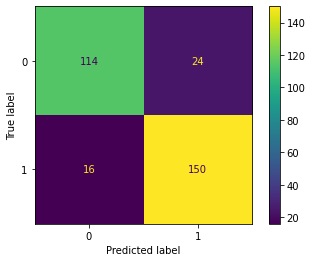

In [618]:
evals=CRF1.evaluate(X_test,y_test,show_confusion_matrix=True)
evals[0]